In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Helper Function: Improved find_column
def find_column(keywords, columns):
    matches = []
    for col in columns:
        for kw in keywords:
            if kw.lower() in col.lower():
                matches.append(col)
                break
    if not matches:
        raise ValueError("No matching column found for keywords: " + str(keywords))
    if len(matches) > 1:
        print("Multiple matches found for", keywords, ":", matches, ". Using the first one:", matches[0])
    return matches[0]

In [4]:
# Load the Dataset and Preprocess
df = pd.read_csv('world_happiness_report.csv')

cols = df.columns.tolist()
country_col         = find_column(["country"], cols)
year_col            = find_column(["year"], cols)
life_ladder_col     = find_column(["life ladder"], cols)
log_gdp_col         = find_column(["log gdp", "gdp"], cols)
social_support_col  = find_column(["social support"], cols)
healthy_life_col    = find_column(["healthy life expectancy"], cols)
freedom_col         = find_column(["freedom"], cols)
generosity_col      = find_column(["generosity"], cols)
corruption_col      = find_column(["corruption"], cols)
positive_affect_col = find_column(["positive affect"], cols)
negative_affect_col = find_column(["negative affect"], cols)

df[year_col] = df[year_col].astype(str)

df = df.dropna()

C:\Users\HP\AppData\Local\Temp\ipykernel_14180\176472201.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_col, y=life_ladder_col, data=top10, palette='viridis')


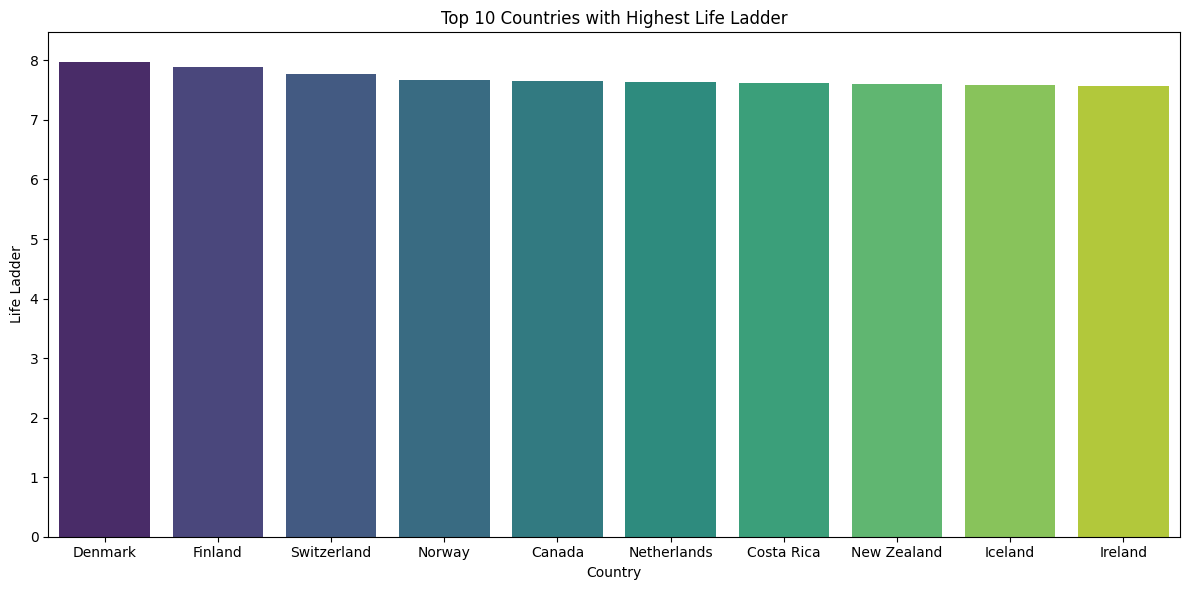

In [5]:
# FIGURE 1: Top 10 Countries with Highest Life Ladder
df_unique = df.sort_values(by=life_ladder_col, ascending=False).drop_duplicates(subset=country_col, keep='first')
top10 = df_unique.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_col, y=life_ladder_col, data=top10, palette='viridis')
plt.title('Top 10 Countries with Highest Life Ladder')
plt.xlabel('Country')
plt.ylabel(life_ladder_col)
plt.ylim(0, top10[life_ladder_col].max() + 0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14180\2951934085.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Happiness Category'] = pd.cut(df_unique[life_ladder_col],


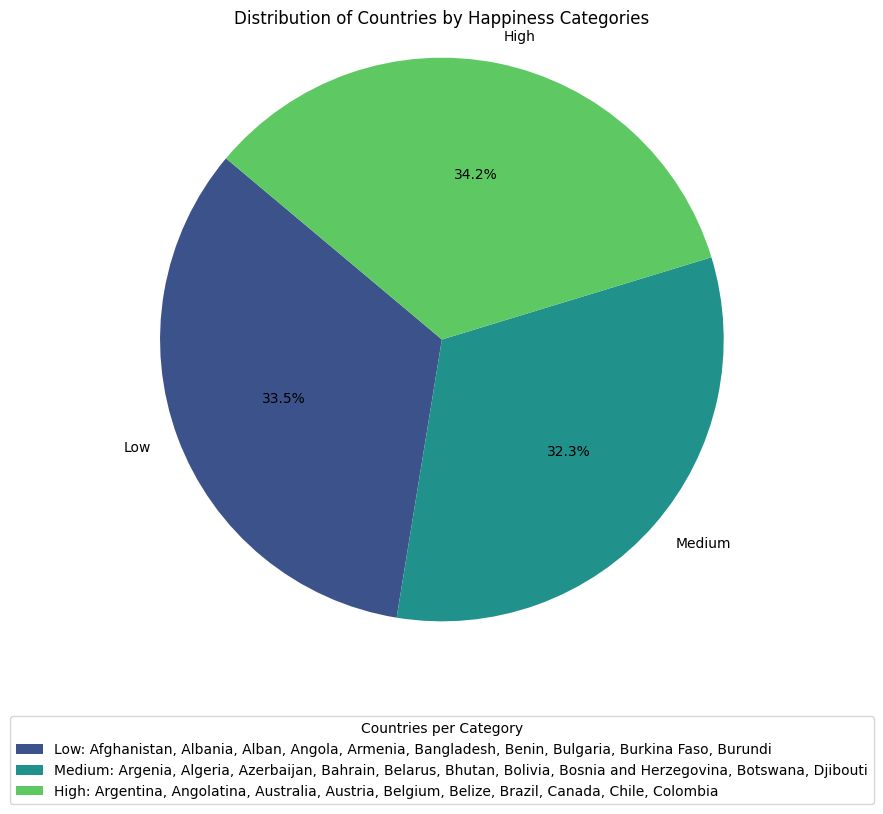

In [ ]:
# FIGURE 2: Distribution of Countries by Happiness Categories

df_unique = df.drop_duplicates(subset=country_col, keep='first')

bins = [df_unique[life_ladder_col].min(),
        df_unique[life_ladder_col].quantile(0.33),
        df_unique[life_ladder_col].quantile(0.66),
        df_unique[life_ladder_col].max()]
cat_labels = ['Low', 'Medium', 'High']
df_unique['Happiness Category'] = pd.cut(df_unique[life_ladder_col],
                                           bins=bins,
                                           labels=cat_labels,
                                           include_lowest=True)
category_counts = df_unique['Happiness Category'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(category_counts.values,
                                   labels=category_counts.index,
                                   autopct='%1.1f%%',
                                   startangle=140,
                                   colors=sns.color_palette('viridis', len(category_counts)))
plt.title('Distribution of Countries by Happiness Categories')

legend_labels = []
for cat in cat_labels:
    countries = df_unique[df_unique['Happiness Category'] == cat][country_col].head(10).tolist()
    if countries:
        legend_labels.append(f"{cat}: {', '.join(countries)}")
plt.legend(legend_labels, title="Countries per Category", loc="upper center",
           bbox_to_anchor=(0.5, -0.1), ncol=1)
plt.axis('equal')
plt.show()